<a href="https://colab.research.google.com/github/larissavaladao/time_series_curuai/blob/main/6.%20parameters_by_period/1.set_periods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importar bibliotecas

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importar dados

In [37]:
#dados obidos = cotas
#eliminar dados duplicados para o mesmo dia
obidos = pd.read_csv('/content/drive/MyDrive/CURUAI_PROCESS/17050001_Cotas.csv').drop_duplicates(subset=['Data'])
obidos = obidos[['EstacaoCodigo', 'Data',  'Maxima', 'Minima', 'Media' ]].copy()
obidos['Data'] = pd.to_datetime(obidos['Data'],dayfirst=True )
obidos

,EstacaoCodigo,Data,Maxima,Minima,Media
0,17050001,2024-10-01,-64.0,-128.0,-102.0
3,17050001,2024-04-01,628.0,510.0,570.0
6,17050001,2024-03-01,510.0,414.0,467.0
9,17050001,2024-02-01,412.0,320.0,370.0
12,17050001,2024-01-01,318.0,160.0,251.0
...,...,...,...,...,...
1940,17050001,1968-06-01,648.0,583.0,617.0
1942,17050001,1968-05-01,646.0,575.0,621.0
1944,17050001,1968-04-01,570.0,478.0,521.0
1946,17050001,1968-03-01,478.0,401.0,436.0


In [3]:
# dados curuai = cotas
#eliminar dados duplicados para o mesmo dia
curuai = pd.read_csv('/content/drive/MyDrive/CURUAI_PROCESS/17060000_Cotas.csv').drop_duplicates(subset=['Data'])
curuai = curuai[['EstacaoCodigo', 'Data',  'Maxima', 'Minima', 'Media' ]].copy()
curuai['Data'] = pd.to_datetime(curuai['Data'],dayfirst=True)
curuai

,EstacaoCodigo,Data,Maxima,Minima,Media
0,17060000,2019-03-01,NaN,NaN,NaN
4,17060000,2019-02-01,904.0,805.0,848.0
8,17060000,2019-01-01,805.0,683.0,747.0
12,17060000,2018-12-01,682.0,465.0,569.0
16,17060000,2018-11-01,461.0,418.0,431.0
...,...,...,...,...,...
1383,17060000,1983-01-01,693.0,597.0,649.0
1387,17060000,1982-12-01,590.0,489.0,540.0
1391,17060000,1982-11-01,NaN,NaN,NaN
1395,17060000,1982-10-01,NaN,NaN,NaN


In [4]:
# concatenar dados das duas estações e restringir para o periodo de tempo que há dados em curuai
cotas = pd.concat([obidos, curuai]).sort_values(by='Data').set_index('Data')
cotas = cotas.loc[curuai['Data'].min():curuai['Data'].max()]

In [5]:
# reajustar indices da tabela para gerar gráfico
cotas = cotas.reset_index()
cotas

,Data,EstacaoCodigo,Maxima,Minima,Media
0,1982-09-01,17050001,514.0,315.0,425.0
1,1982-09-01,17060000,789.0,609.0,711.0
2,1982-10-01,17060000,NaN,NaN,NaN
3,1982-10-01,17050001,308.0,142.0,217.0
4,1982-11-01,17050001,176.0,143.0,155.0
...,...,...,...,...,...
857,2019-01-01,17060000,805.0,683.0,747.0
858,2019-02-01,17050001,634.0,530.0,577.0
859,2019-02-01,17060000,904.0,805.0,848.0
860,2019-03-01,17060000,NaN,NaN,NaN


<Axes: xlabel='Data', ylabel='Media'>

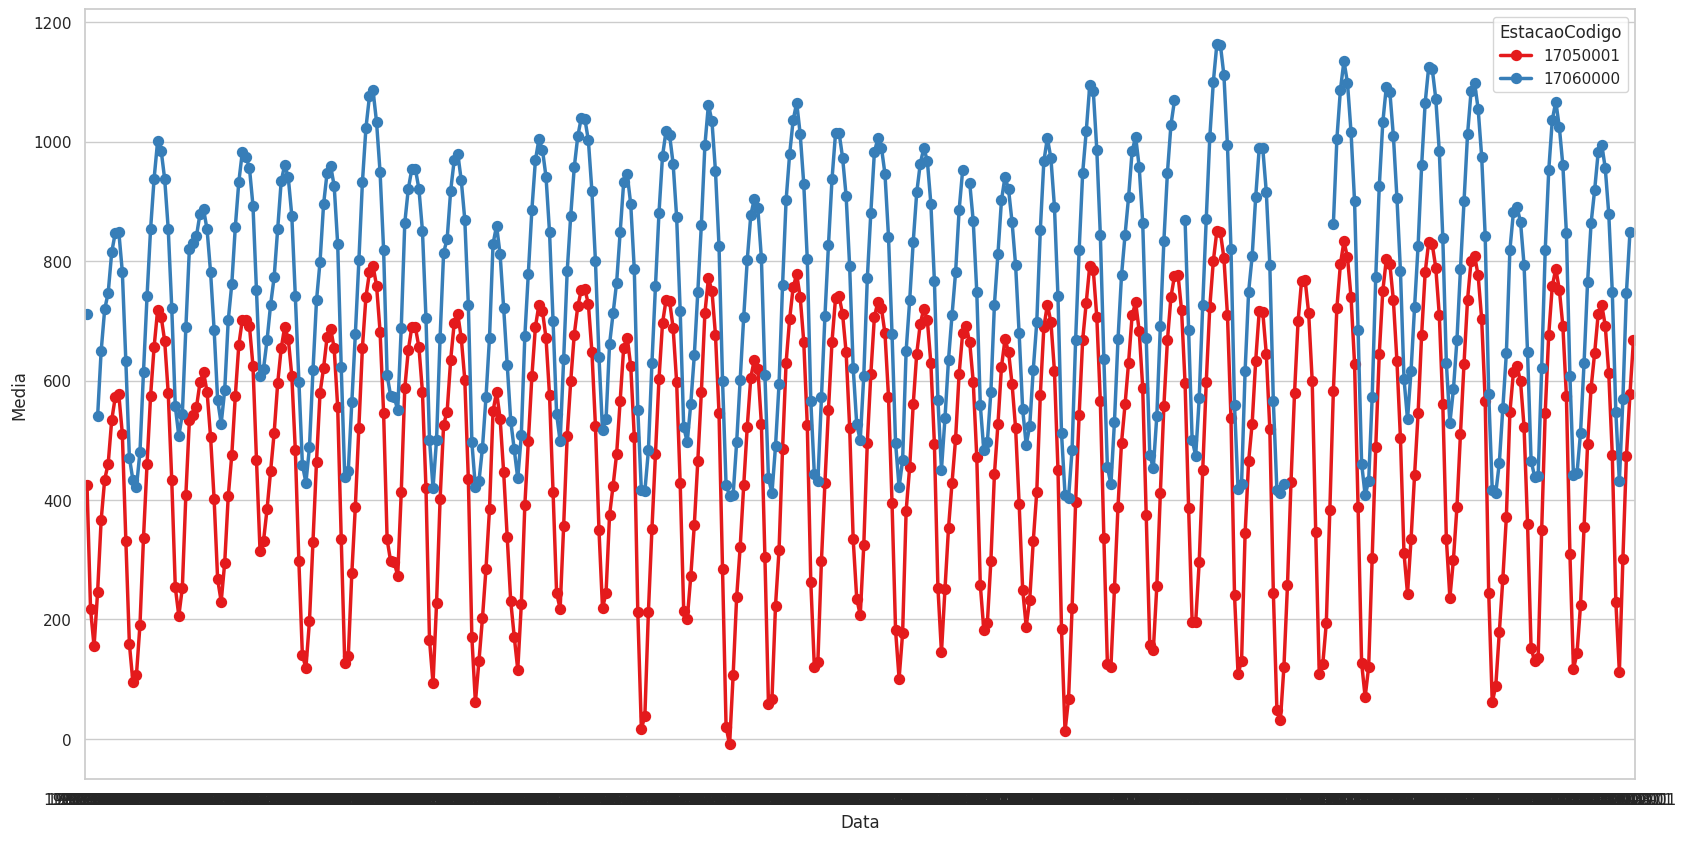

In [6]:
#comparar dados = seguem o mesmo padrão, aproximadamente
sns.set_theme(style="whitegrid",rc={'figure.figsize':(20,10)})
sns.pointplot(data=cotas,x = cotas['Data'],y = cotas['Media'], hue = cotas['EstacaoCodigo'], palette="Set1", linewidth=2.5)
# mostra que dados das duas estações tem comportamento similar, apesar dos valores de curuai serem maiores que o de obidos.

<Axes: xlabel='Data', ylabel='Media'>

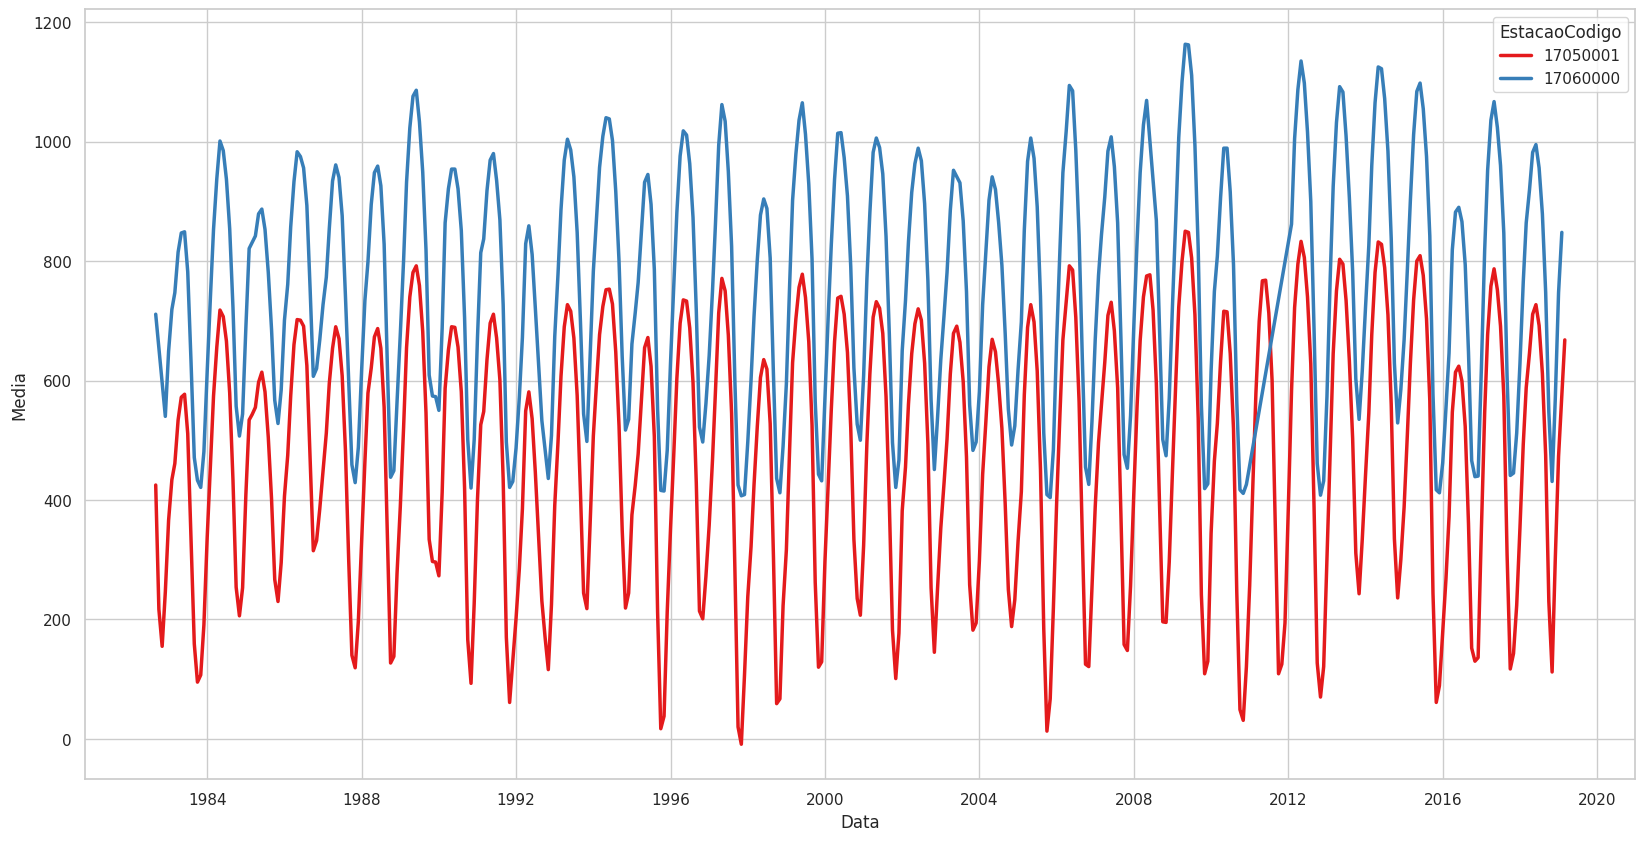

In [7]:
#comparar dados = seguem o mesmo padrão, aproximadamente
# grafico de linhas
sns.set_theme(style="whitegrid",rc={'figure.figsize':(20,10)})
sns.lineplot(data=cotas,x = cotas['Data'],y = cotas['Media'], hue = cotas['EstacaoCodigo'], palette="Set1", linewidth=2.5)

# Trabalhar com dados de Obidos

In [38]:
# adicionar periodos de água a partir de valores estabelecidos a partir do gráfico
def set_period(row):
  media = row['Media']
  data = row['Data']
  if media > 550:
    return 'HW'
  elif media < 350:
    return 'LW'
  elif media >= 350 and media <= 550:
    return "T"


In [39]:
# obter dados de óbidos apenas para o periodo entre 2000 e 2024
obidos_att = obidos.loc[(obidos['Data'].dt.year >= 2000) & (obidos['Data'].dt.year < 2025)].copy()
obidos_att['water_period3'] = obidos_att.apply(lambda row: set_period(row),axis = 1)
obidos_att.describe()

,EstacaoCodigo,Data,Maxima,Minima,Media
count,293.0,293,293.000000,293.000000,293.000000
mean,17050001.0,2012-03-02 01:48:07.372013568,547.061433,439.286689,493.948805
min,17050001.0,2000-01-01 00:00:00,-64.000000,-128.000000,-102.000000
25%,17050001.0,2006-02-01 00:00:00,394.000000,213.000000,300.000000
50%,17050001.0,2012-03-01 00:00:00,600.000000,475.000000,546.000000
75%,17050001.0,2018-04-01 00:00:00,729.000000,659.000000,699.000000
max,17050001.0,2024-10-01 00:00:00,860.000000,839.000000,850.000000
std,0.0,NaN,217.462978,245.781156,233.019461


In [40]:
obidos_att['fall'] = ((obidos_att.loc[obidos_att['water_period3'] == "T"]['Data'].dt.month >= 1) & (obidos_att.loc[obidos_att['water_period3'] == "T"]['Data'].dt.month <= 4)) | (obidos_att.loc[obidos_att['water_period3'] == "T"]['Data'].dt.month == 12)
obidos_att['rise'] = ((obidos_att.loc[obidos_att['water_period3'] == "T"]['Data'].dt.month >= 6) & (obidos_att.loc[obidos_att['water_period3'] == "T"]['Data'].dt.month <= 10))

In [41]:
# adicionar periodos de água a partir de valores estabelecidos a partir do gráfico
def set_fall_rise(row):
  if row['rise'] == True and row['water_period3'] == 'T':
    return 'R'
  elif row['fall'] == True and row['water_period3'] == 'T':
    return 'F'
  else:
    return row['water_period3']

obidos_att['water_period'] = obidos_att.apply(lambda row: set_fall_rise(row),axis = 1)
obidos_att

,EstacaoCodigo,Data,Maxima,Minima,Media,water_period3,fall,rise,water_period
0,17050001,2024-10-01,-64.0,-128.0,-102.0,LW,NaN,NaN,LW
3,17050001,2024-04-01,628.0,510.0,570.0,HW,NaN,NaN,HW
6,17050001,2024-03-01,510.0,414.0,467.0,T,True,False,F
9,17050001,2024-02-01,412.0,320.0,370.0,T,True,False,F
12,17050001,2024-01-01,318.0,160.0,251.0,LW,NaN,NaN,LW
...,...,...,...,...,...,...,...,...,...
1101,17050001,2000-05-01,753.0,713.0,738.0,HW,NaN,NaN,HW
1102,17050001,2000-04-01,710.0,614.0,665.0,HW,NaN,NaN,HW
1103,17050001,2000-03-01,613.0,484.0,551.0,HW,NaN,NaN,HW
1104,17050001,2000-02-01,487.0,366.0,429.0,T,True,False,F


<Axes: xlabel='Data', ylabel='Media'>

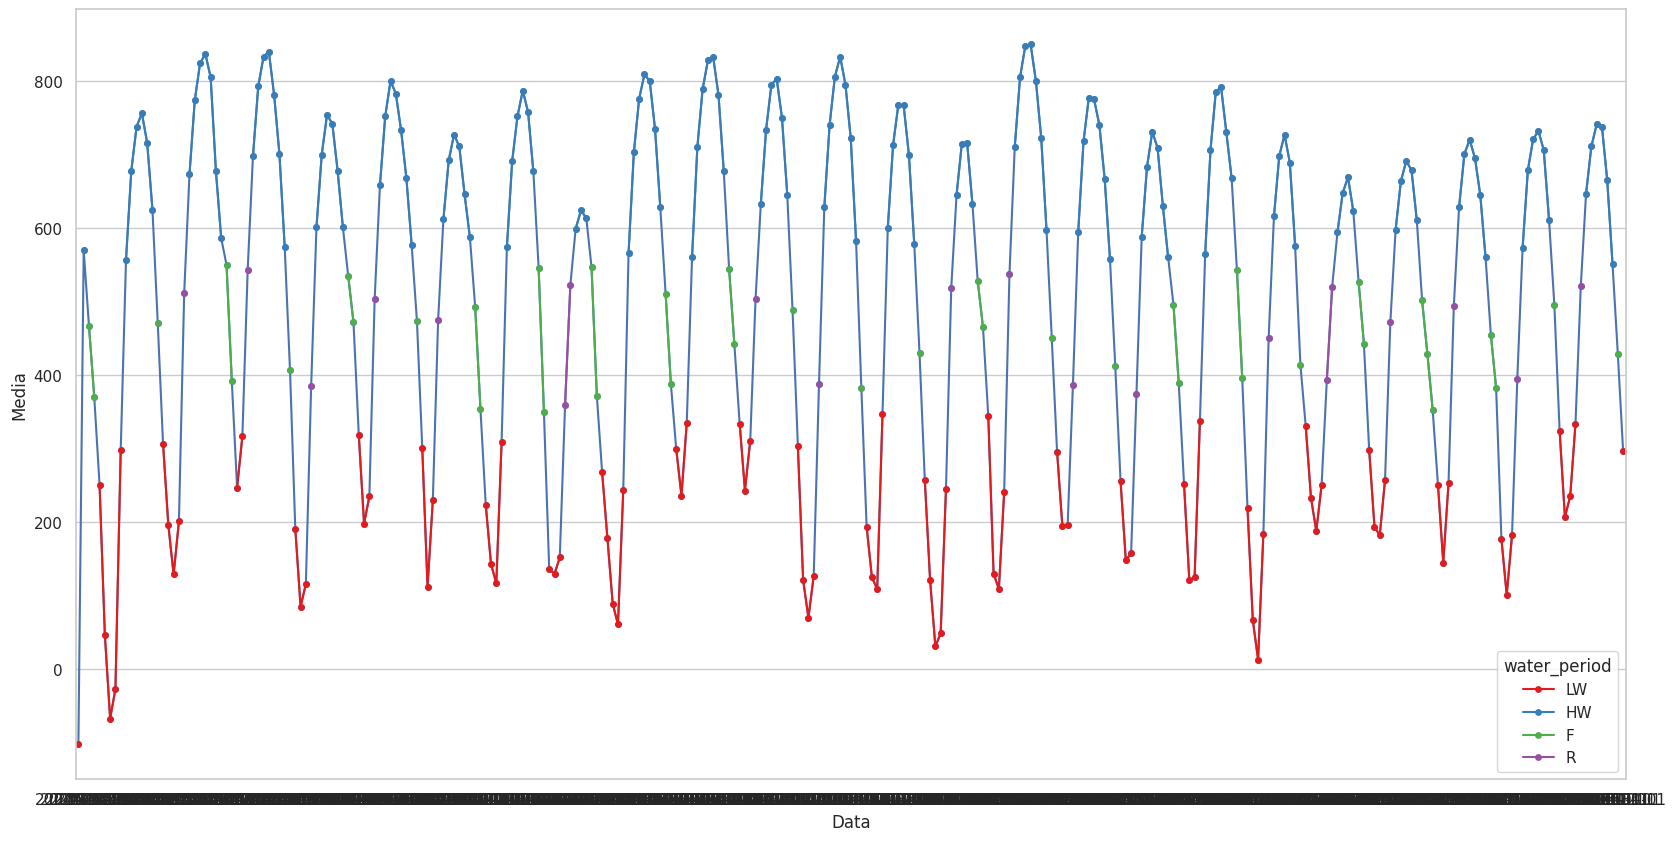

In [42]:
sns.set_theme(style="whitegrid",rc={'figure.figsize':(20,10)})
sns.pointplot(data=obidos_att,x = obidos_att['Data'],y = obidos_att['Media'],  linewidth=1.5)
sns.pointplot(data=obidos_att,x = obidos_att['Data'],y = obidos_att['Media'], hue = obidos_att['water_period'], palette="Set1", linewidth=1.5)

In [43]:
obidos_att.to_csv('/content/drive/MyDrive/CURUAI_PROCESS/vazao_obidos.csv')